In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from feature_engine.outliers import Winsorizer
import joblib
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy import stats
import pylab
import warnings
import pickle

In [3]:
df = pd.read_csv(r"E:\DS\DS_Project_Team_95\Final_Money_Laundering_Dataset.csv")

In [4]:
df = df.drop(['step','Unnamed: 0','nameOrig','nameDest'],axis=1)

In [5]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [6]:
df = df.reindex(columns=['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud'])

In [7]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'isFraud'],
      dtype='object')

In [8]:
df.dtypes

type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud    float64
isFraud           float64
dtype: object

In [9]:
warnings.filterwarnings('ignore')

In [10]:
df.shape

(100000, 8)

In [11]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
count,1.000000e+05,9.985700e+04,9.997800e+04,9.994800e+04,1.000000e+05,99929.000000,99683.000000
mean,1.736022e+05,8.789148e+05,8.942587e+05,8.805609e+05,1.184041e+06,0.000010,0.004163
std,3.443003e+05,2.674992e+06,2.711584e+06,2.402526e+06,2.802350e+06,0.003163,0.064389
min,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.963562e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,5.274552e+04,2.010000e+04,0.000000e+00,2.082250e+04,4.990918e+04,0.000000,0.000000
75%,2.117631e+05,1.908585e+05,2.149436e+05,5.881914e+05,1.058186e+06,0.000000,0.000000
max,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,1.000000


In [12]:
#Checking Duplicates
duplicate = df.duplicated()
sum(duplicate)

4

In [13]:
df = df.drop_duplicates()

In [14]:
duplicate = df.duplicated()
sum(duplicate)

0

In [15]:
df.shape

(99996, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            99996 non-null  object 
 1   amount          99996 non-null  float64
 2   oldbalanceOrg   99853 non-null  float64
 3   newbalanceOrig  99974 non-null  float64
 4   oldbalanceDest  99944 non-null  float64
 5   newbalanceDest  99996 non-null  float64
 6   isFlaggedFraud  99925 non-null  float64
 7   isFraud         99679 non-null  float64
dtypes: float64(7), object(1)
memory usage: 6.9+ MB


In [17]:
# Exploratory Data Analysis
# Measures of Central Tendency / First moment business decision
df.mean()

amount            1.736086e+05
oldbalanceOrg     8.789500e+05
newbalanceOrig    8.942944e+05
oldbalanceDest    8.805962e+05
newbalanceDest    1.184089e+06
isFlaggedFraud    1.000751e-05
isFraud           4.163364e-03
dtype: float64

In [18]:
df.median()

amount            52759.675
oldbalanceOrg     20101.000
newbalanceOrig        0.000
oldbalanceDest    20833.500
newbalanceDest    49912.565
isFlaggedFraud        0.000
isFraud               0.000
dtype: float64

In [19]:
df.mode()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,PAYMENT,2475.13,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,6285.19,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,17320.91,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,25975.86,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,29707.86,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,89631.24,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Measures of Dispersion / Second moment business decision
df.var()

amount            1.185464e+11
oldbalanceOrg     7.155837e+12
newbalanceOrig    7.352948e+12
oldbalanceDest    5.772332e+12
newbalanceDest    7.853422e+12
isFlaggedFraud    1.000751e-05
isFraud           4.146072e-03
dtype: float64

In [21]:
df.std()

amount            3.443057e+05
oldbalanceOrg     2.675040e+06
newbalanceOrig    2.711632e+06
oldbalanceDest    2.402568e+06
newbalanceDest    2.802396e+06
isFlaggedFraud    3.163464e-03
isFraud           6.439000e-02
dtype: float64

In [22]:
# Third moment business decision
df.skew()

amount              5.428226
oldbalanceOrg       4.954125
newbalanceOrig      4.888816
oldbalanceDest      5.056792
newbalanceDest      4.319447
isFlaggedFraud    316.109158
isFraud            15.401353
dtype: float64

In [23]:
# Fourth moment business decision
df.kurt()

amount               48.097455
oldbalanceOrg        31.530195
newbalanceOrig       30.700646
oldbalanceDest       32.474361
newbalanceDest       23.914298
isFlaggedFraud    99925.000000
isFraud             235.206400
dtype: float64

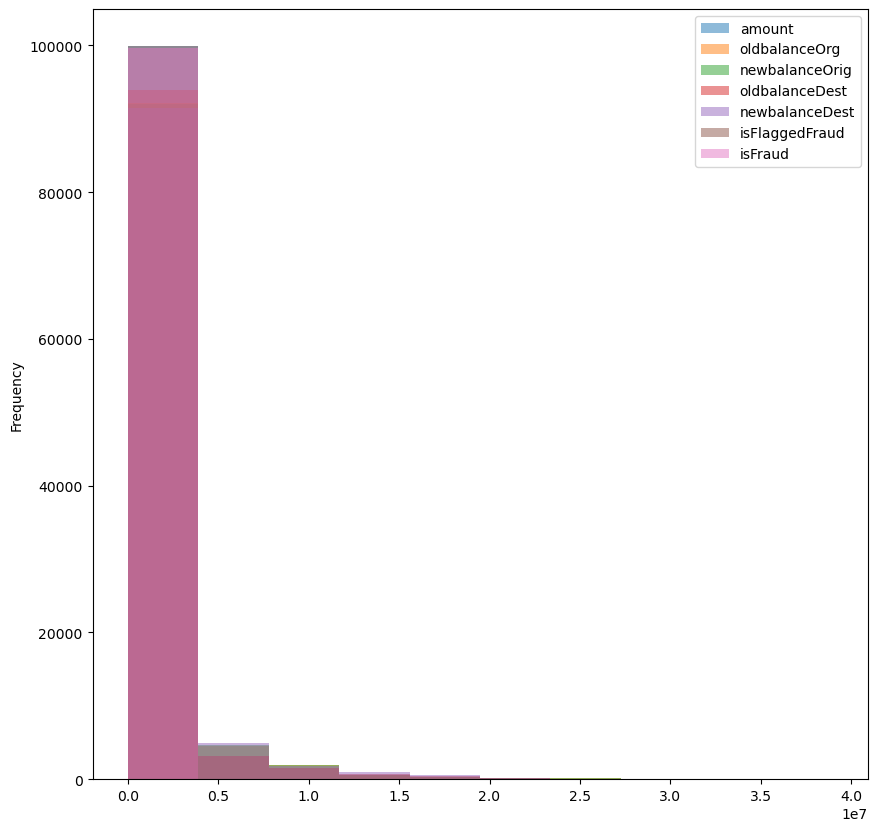

In [24]:
ax = df.plot.hist(alpha=0.5, figsize=(10,10),bins=10)

In [25]:
# Checking for Null values
df.isnull().sum()

type                0
amount              0
oldbalanceOrg     143
newbalanceOrig     22
oldbalanceDest     52
newbalanceDest      0
isFlaggedFraud     71
isFraud           317
dtype: int64

In [26]:
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(object)
df['isFraud']= df['isFraud'].astype(object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            99996 non-null  object 
 1   amount          99996 non-null  float64
 2   oldbalanceOrg   99853 non-null  float64
 3   newbalanceOrig  99974 non-null  float64
 4   oldbalanceDest  99944 non-null  float64
 5   newbalanceDest  99996 non-null  float64
 6   isFlaggedFraud  99925 non-null  object 
 7   isFraud         99679 non-null  object 
dtypes: float64(5), object(3)
memory usage: 6.9+ MB


In [28]:
X = df.drop(['isFraud'], axis = 1)
Y = df[['isFraud']]

In [29]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0
2,TRANSFER,181.00,181.0,0.00,0.00,0.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,0.0
4,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0
...,...,...,...,...,...,...,...
99995,PAYMENT,4020.66,NaN,155908.34,0.00,0.00,0.0
99996,PAYMENT,18345.49,NaN,0.00,0.00,0.00,0.0
99997,CASH_IN,183774.91,NaN,222947.91,54925.05,0.00,0.0
99998,CASH_OUT,82237.17,NaN,0.00,592635.66,799140.46,0.0


In [30]:
#Separating Numeric and Categorical columns
numeric_features = X.select_dtypes(exclude = ['object']).columns
numeric_features

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [31]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index(['type', 'isFlaggedFraud'], dtype='object')

In [63]:
from sklearn.preprocessing import OneHotEncoder
# Define pipeline for missing data if any
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'median')),('scale', MinMaxScaler())])
cat_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'most_frequent')),('encoding',OneHotEncoder(sparse_output = False))])

preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features),('cat',cat_pipeline,categorical_features)])

imp_enc_scale = preprocessor.fit(X)
    
joblib.dump(imp_enc_scale, 'imp_enc_scale')

clean_data = pd.DataFrame(imp_enc_scale.transform(X), columns = imp_enc_scale.get_feature_names_out())
clean_data

,num__amount,num__oldbalanceOrg,num__newbalanceOrig,num__oldbalanceDest,num__newbalanceDest,cat__type_CASH_IN,cat__type_CASH_OUT,cat__type_DEBIT,cat__type_PAYMENT,cat__type_TRANSFER,cat__isFlaggedFraud_0.0,cat__isFlaggedFraud_1.0
0,0.000984,0.005034,0.004713,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000186,0.000629,0.000570,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.000018,0.000005,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.000018,0.000005,0.000000,0.000623,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.001167,0.001230,0.000879,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0.000402,0.000595,0.004584,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
99992,0.001835,0.000595,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
99993,0.018377,0.000595,0.006556,0.001615,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99994,0.008224,0.000595,0.000000,0.017426,0.020519,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [64]:
clean_data.isnull().sum()

num__amount                0
num__oldbalanceOrg         0
num__newbalanceOrig        0
num__oldbalanceDest        0
num__newbalanceDest        0
cat__type_CASH_IN          0
cat__type_CASH_OUT         0
cat__type_DEBIT            0
cat__type_PAYMENT          0
cat__type_TRANSFER         0
cat__isFlaggedFraud_0.0    0
cat__isFlaggedFraud_1.0    0
dtype: int64

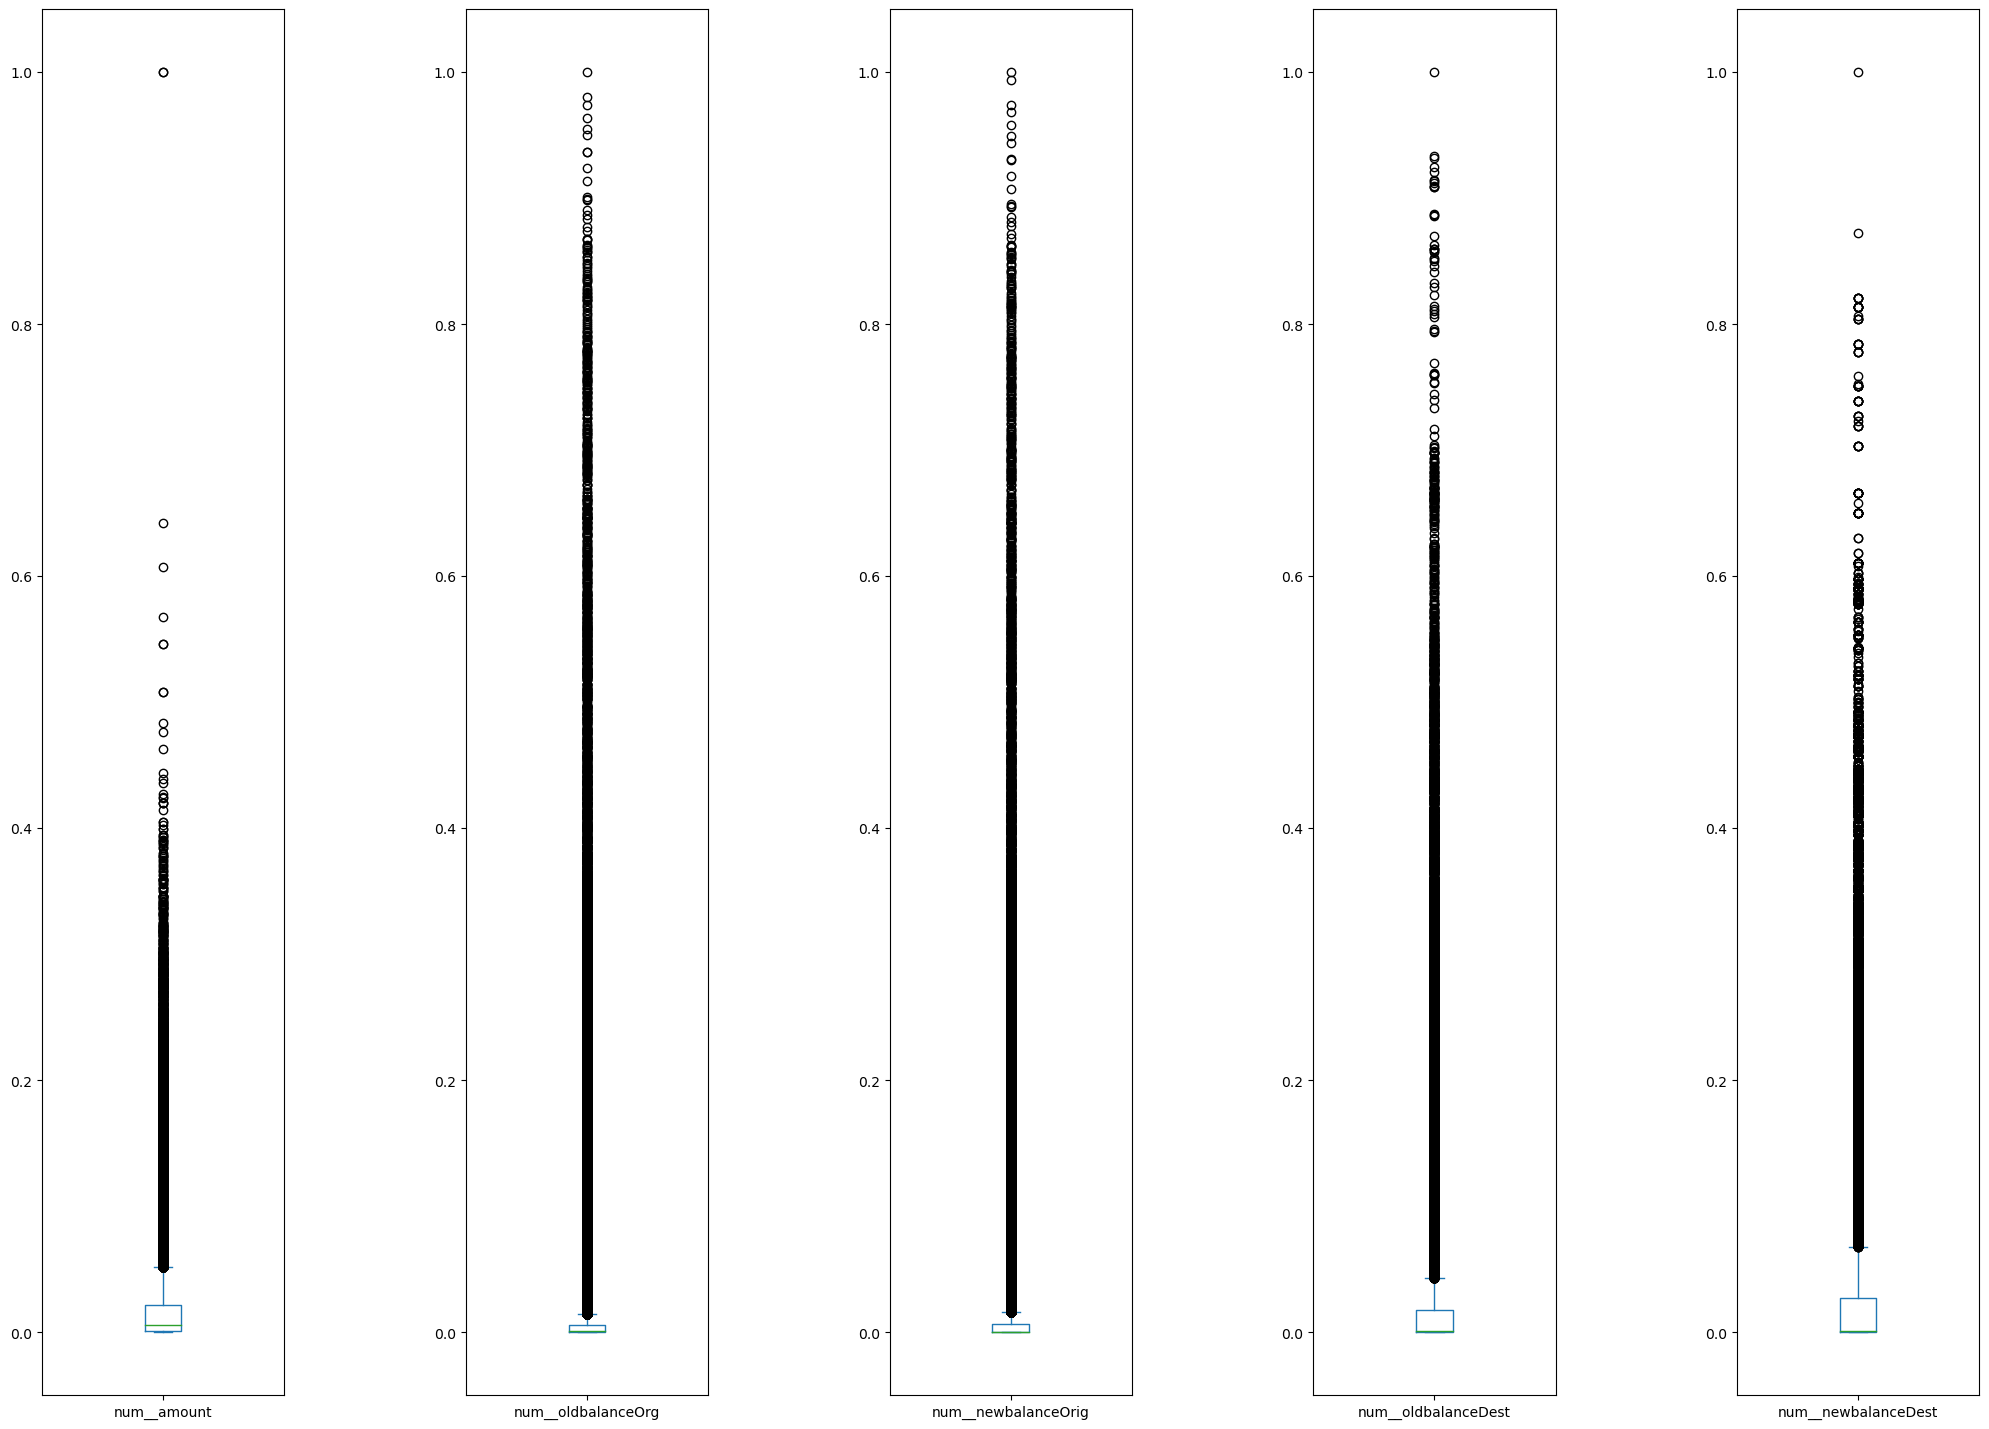

In [65]:
### Outlier Analysis
clean_data.iloc[:,0:5].plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18))
# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [78]:
import feature_engine.outliers.winsorizer
from feature_engine.outliers.winsorizer import Winsorizer
winsorizer = Winsorizer(capping_method = 'iqr', # choose skewed for IQR rule boundaries or gaussian for mean and std
                        tail = 'both', # cap left, right or both tails
                        fold = 1.5, # 1.5 times of iqr
                        variables = list(clean_data.iloc[:,0:5]))

clean = winsorizer.fit(clean_data[list(clean_data.iloc[:,0:5])])

# Save winsorizer model
joblib.dump(clean, 'winsorizer')

clean_data[list(clean_data.iloc[:,0:5])] = clean.transform(clean_data[list(clean_data.iloc[:,0:5])])

In [79]:
clean_data

,num__amount,num__oldbalanceOrg,num__newbalanceOrig,num__oldbalanceDest,num__newbalanceDest,cat__type_CASH_IN,cat__type_CASH_OUT,cat__type_DEBIT,cat__type_PAYMENT,cat__type_TRANSFER,cat__isFlaggedFraud_0.0,cat__isFlaggedFraud_1.0
0,0.000984,0.005034,0.004713,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000186,0.000629,0.000570,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.000018,0.000005,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.000018,0.000005,0.000000,0.000623,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.001167,0.001230,0.000879,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0.000402,0.000595,0.004584,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
99992,0.001835,0.000595,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0
99993,0.018377,0.000595,0.006556,0.001615,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99994,0.008224,0.000595,0.000000,0.017426,0.020519,0.0,1.0,0.0,0.0,0.0,1.0,0.0


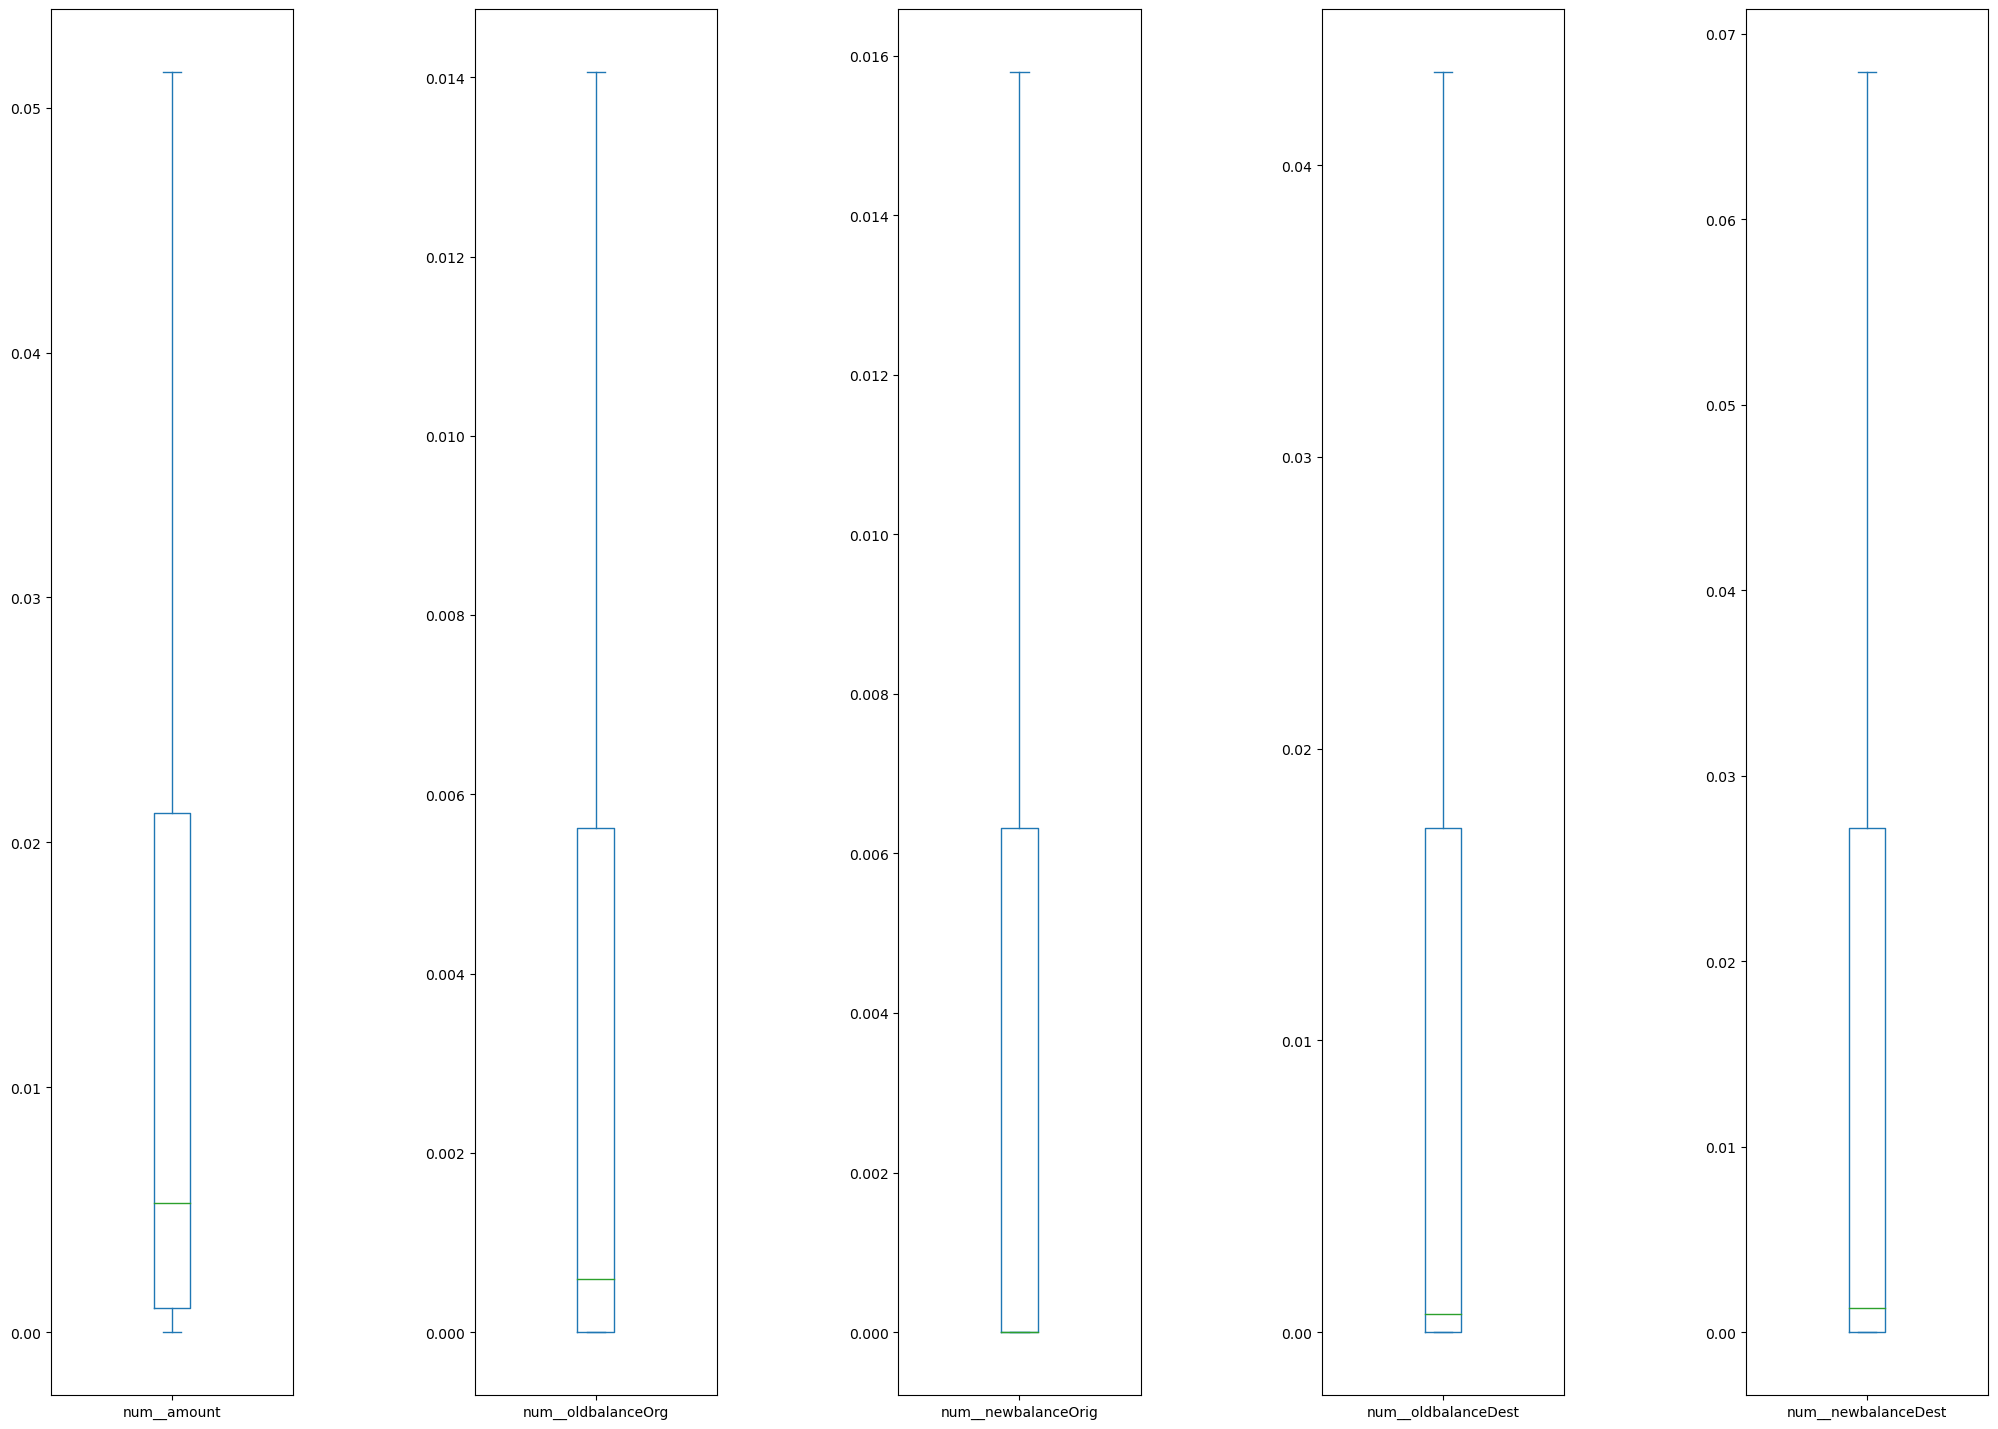

In [80]:
### Outlier Analysis
clean_data.iloc[:,0:5].plot(kind = 'box', subplots = True, sharey = False, figsize = (25, 18))
# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [235]:
#Normalization
# or denominator (i.max()-i.min())
def norm_func(i):
    clean_data = (i-i.min())/(i.max()-i.min())
    return(clean_data)
joblib.dump(clean_data, 'Scale')

['Scale']

In [236]:
clean_data_norm = norm_func(clean_data)

In [237]:
clean_data_norm

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type
0,0.000984,0.358091,0.298448,0.0,0.0,0.0,NaN
1,0.000186,0.044723,0.036091,0.0,0.0,0.0,NaN
2,0.000018,0.000381,0.0,0.0,0.0,0.0,NaN
3,0.000018,0.000381,0.0,0.014418,0.0,0.0,NaN
4,0.001167,0.08746,0.055643,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
99991,0.000402,0.042307,0.290278,0.0,0.0,0.0,NaN
99992,0.001835,0.042307,0.0,0.0,0.0,0.0,NaN
99993,0.018377,0.042307,0.415096,0.037386,0.0,0.0,NaN
99994,0.008224,0.042307,0.0,0.403395,0.302061,0.0,NaN


In [233]:
clean_data_norm

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type
0,0.000984,0.358091,0.298448,0.0,0.0,0.0,NaN
1,0.000186,0.044723,0.036091,0.0,0.0,0.0,NaN
2,0.000018,0.000381,0.0,0.0,0.0,0.0,NaN
3,0.000018,0.000381,0.0,0.014418,0.0,0.0,NaN
4,0.001167,0.08746,0.055643,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
99991,0.000402,0.042307,0.290278,0.0,0.0,0.0,NaN
99992,0.001835,0.042307,0.0,0.0,0.0,0.0,NaN
99993,0.018377,0.042307,0.415096,0.037386,0.0,0.0,NaN
99994,0.008224,0.042307,0.0,0.403395,0.302061,0.0,NaN


In [208]:
Y['isFraud'].isnull().sum()

317

In [209]:
imputation = SimpleImputer(strategy = 'most_frequent')

In [210]:
Y['isFraud'] = imputation.fit_transform(Y[['isFraud']]).astype('int64')

In [211]:
Y.isna().sum()

isFraud    0
dtype: int64

In [212]:
# Define the SMOTE parameters
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [213]:
# Apply SMOTE to the training data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(clean_data_norm, Y)

In [214]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [215]:
print("Original dataset:")
print(clean_data_norm)

Original dataset:
         amount oldbalanceOrg newbalanceOrig oldbalanceDest newbalanceDest  \
0      0.000984      0.358091       0.298448            0.0            0.0   
1      0.000186      0.044723       0.036091            0.0            0.0   
2      0.000018      0.000381            0.0            0.0            0.0   
3      0.000018      0.000381            0.0       0.014418            0.0   
4      0.001167       0.08746       0.055643            0.0            0.0   
...         ...           ...            ...            ...            ...   
99991  0.000402      0.042307       0.290278            0.0            0.0   
99992  0.001835      0.042307            0.0            0.0            0.0   
99993  0.018377      0.042307       0.415096       0.037386            0.0   
99994  0.008224      0.042307            0.0       0.403395       0.302061   
99995   0.00201      0.042307       0.167605            0.0            0.0   

      isFlaggedFraud  type  
0               

In [216]:
print("\nResampled dataset:")
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)
print(resampled_data)


Resampled dataset:
          amount oldbalanceOrg newbalanceOrig oldbalanceDest newbalanceDest  \
0       0.000984      0.358091       0.298448            0.0            0.0   
1       0.000186      0.044723       0.036091            0.0            0.0   
2       0.000018      0.000381            0.0            0.0            0.0   
3       0.000018      0.000381            0.0       0.014418            0.0   
4       0.001167       0.08746       0.055643            0.0            0.0   
...          ...           ...            ...            ...            ...   
199157  0.000291           0.0            0.0            0.0            0.0   
199158  0.000979           0.0            0.0            0.0            0.0   
199159   0.01185           0.0            0.0        0.09794            0.0   
199160  0.001806           0.0            0.0            0.0            0.0   
199161  0.016073           0.0            0.0       0.165478       0.480687   

       isFlaggedFraud  type  is

In [217]:
resampled_data.shape

(199162, 8)

In [218]:
resampled_data['isFraud'].value_counts()

0    99581
1    99581
Name: isFraud, dtype: int64

In [219]:
print(y_train.value_counts()/80000)
print("\n")
print(y_test.value_counts()/20000)

isFraud
0          0.996700
1          0.994912
dtype: float64


isFraud
1          0.99940
0          0.99225
dtype: float64


# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score ,recall_score,accuracy_score, f1_score
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
logreg_score = accuracy_score(y_test, y_pred)
logreg_conf = confusion_matrix(y_test, y_pred)
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, logreg.predict(X_train))
print('Train accuracy: ', train_acc*100)
print('Test accuracy: ', test_acc*100)
F1 = f1_score(y_test, y_pred)
print('f1 score: ', F1*100)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Train accuracy:  65.15323638508997
Test accuracy:  65.2072402279517
f1 score:  69.92991820174012
Accuracy:  0.652072402279517
Precision:  0.6174092946630397
Recall:  0.8062337402441465
F1 score:  0.6992991820174012


In [171]:
from sklearn.model_selection import GridSearchCV
# define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [172]:
# define the metrics to evaluate the model
scoring = {'accuracy': 'accuracy',
           'f1': 'f1',
           'precision': 'precision',
           'recall': 'recall'}

In [60]:
# define grid search
grid = GridSearchCV(logreg, param_grid, scoring=scoring, refit='accuracy', cv=4)

In [61]:
# fit grid search on training data
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [62]:
# print the best hyperparameters and corresponding metrics
print("Best Hyperparameters:", grid.best_params_)
print("Best Accuracy:", accuracy_score(y_test, grid.predict(X_test)))
print("Best F1 Score:", grid.cv_results_['mean_test_f1'][grid.best_index_])
print("Best Precision Score:", grid.cv_results_['mean_test_precision'][grid.best_index_])
print("Best Recall Score:", grid.cv_results_['mean_test_recall'][grid.best_index_])

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best Accuracy: 0.6485577285165566
Best F1 Score: 0.6992384465474312
Best Precision Score: 0.6170176683101928
Best Recall Score: 0.8067417959691314


# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score ,recall_score,accuracy_score, f1_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
dt_score = accuracy_score(y_test, y_pred)
dt_conf = confusion_matrix(y_test, y_pred)
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, dt.predict(X_train))
print('Train accuracy: ', train_acc*100)
print('Test accuracy: ', test_acc*100)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Train accuracy:  99.25751118754276
Test accuracy:  93.51542690733814
Accuracy:  0.9351542690733814
Precision:  0.9305397516449809
Recall:  0.9410146087652591
F1 score:  0.9357478669684833


In [68]:
# create a dictionary of all hyperparameters to be experimented
param_grid = { 'criterion':['gini','entropy'], 'max_depth': np.arange(3, 15)}

# GridsearchCV with cross-validation to perform experiments with parameters set
dtree_gscv = GridSearchCV(dt, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

In [69]:
# Train
dtree_gscv.fit(clean_data, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy', verbose=1)

In [70]:
# The best set of parameter values
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [71]:
# Model with best parameter values
DT_best = dtree_gscv.best_estimator_

In [72]:
DT_best

DecisionTreeClassifier(max_depth=3)

In [76]:
# Accuracy

print(accuracy_score(y_test, y_pred))

0.935882308638566


# K Neighbor Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, y_pred)
knn_conf = confusion_matrix(y_test, y_pred)
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, knn.predict(X_train))
print('Train accuracy: ', train_acc*100)
print('Test accuracy: ', test_acc*100)
F1 = f1_score(y_test, y_pred)
print('f1 score: ', F1*100)
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Train accuracy:  94.23206070457984
Test accuracy:  92.37817889689454
f1 score:  92.65353530465083
Precision:  0.897225606898491
Recall:  0.9578246948168901
F1 score:  0.9265353530465084


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.spatial import distance
from scipy.stats import uniform

In [99]:
#Define the range of parameters to test
params = {'n_neighbors': [3, 5, 7, 9],
         'metric': ['euclidean', 'manhattan', 'minkowski'],
         'weights': ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), params, cv = 5)

grid.fit(X_train, y_train)

print('Best parameters:', grid.best_params_)
print('Best cross-validation score:', grid.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.9204036918719213


# Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, y_pred)
nb_conf = confusion_matrix(y_test, y_pred)
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, nb.predict(X_train))
print('Train accuracy: ', train_acc*100)
print('Test accuracy: ', test_acc*100)
F1 = f1_score(y_test, y_pred)
print('f1 score: ', F1*100)
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Train accuracy:  58.06978014046407
Test accuracy:  58.213039439660584
f1 score:  69.89999819164903
Precision:  0.5473365240293393
Recall:  0.9669301580948569
F1 score:  0.6989999819164903


# Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,precision_score ,recall_score,accuracy_score, f1_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_score = accuracy_score(y_test, y_pred)
rf_conf = confusion_matrix(y_test, y_pred)
test_acc = accuracy_score(y_test, y_pred)
train_acc = accuracy_score(y_train, rf.predict(X_train))
print('Train accuracy: ', train_acc*100)
print('Test accuracy: ', test_acc*100)
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Train accuracy:  99.26002171607178
Test accuracy:  94.61752818015214
Precision:  0.9360277587723586
Recall:  0.9582249349609766
F1 score:  0.9469962917181706


In [221]:
pickle.dump(rf,open('rf.pkl','wb'))

# ANN

In [102]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 50, batch_size = 10)

_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f%%' % (accuracy*100))
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print('Train accuracy: ', train_accuracy*100)
F1 = f1_score(y_test, y_pred)
print('F1 score:', F1)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).